# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df= pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the dataset

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# fill the missing values for numerical terms -mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
# fill the missing values for categorical terms -mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

# Exporatory Data Analysis

# categorical visualization

C:\Users\maury\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

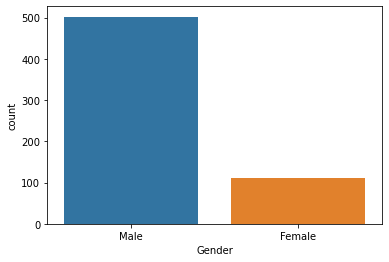

In [10]:
sns.countplot(df['Gender'])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

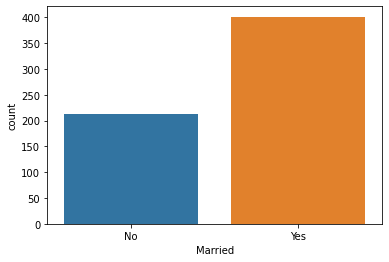

In [11]:
sns.countplot(df['Married'])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

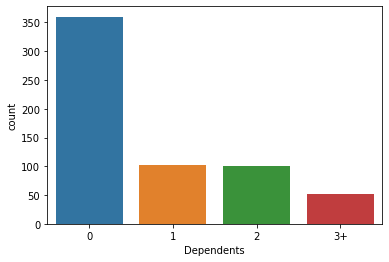

In [12]:
sns.countplot(df['Dependents'])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

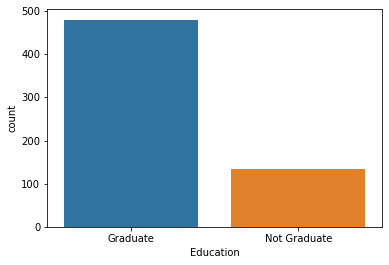

In [13]:
sns.countplot(df['Education'])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

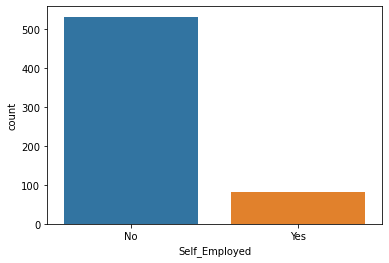

In [14]:
sns.countplot(df['Self_Employed'])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

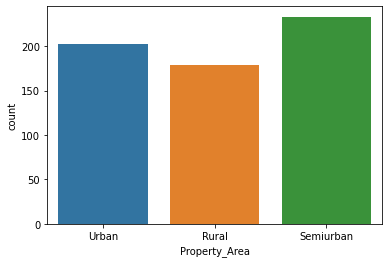

In [15]:
sns.countplot(df['Property_Area'])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

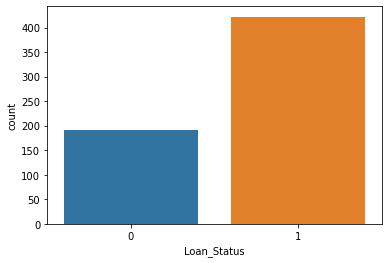

In [16]:
sns.countplot(df['Loan_Status'])

# numerical attributes visualization

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

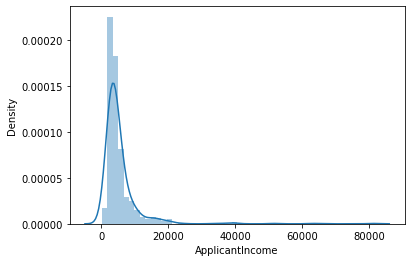

In [17]:
sns.distplot(df["ApplicantIncome"])

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

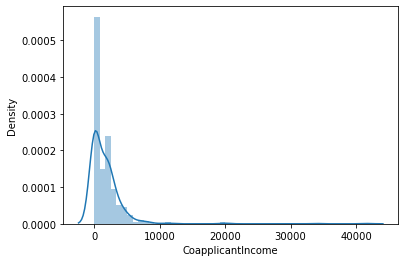

In [19]:
sns.distplot(df["CoapplicantIncome"])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

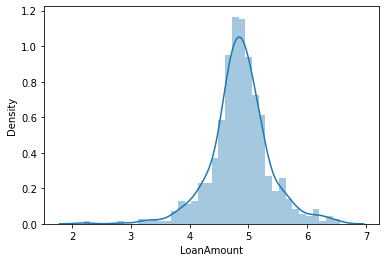

In [20]:
# apply log transformation to the attribute
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmount"])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

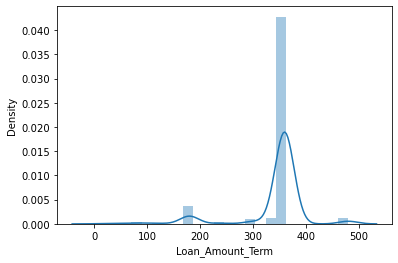

In [21]:
sns.distplot(df["Loan_Amount_Term"])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

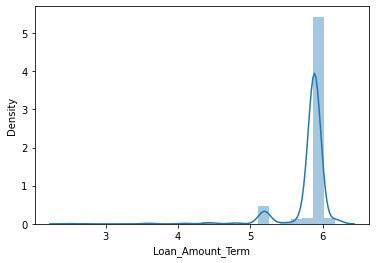

In [22]:
# apply log transformation to the attribute
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term"])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

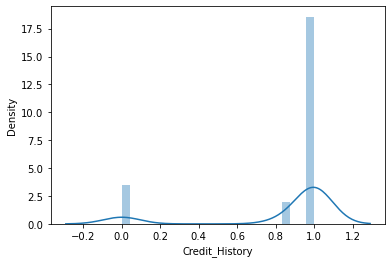

In [23]:
sns.distplot(df["Credit_History"])

# Creation of new attributes

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,1


In [25]:
df['Total_Income'] =df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,1,6000.0


# LOG TRANSFORMATION

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicationIncomeLog', ylabel='Density'>

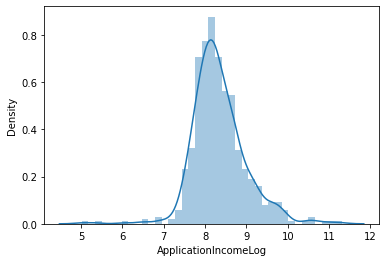

In [26]:
df['ApplicationIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df["ApplicationIncomeLog"])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

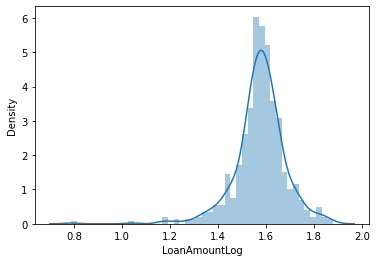

In [27]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

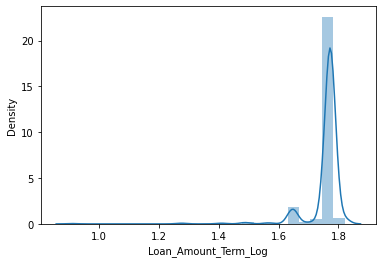

In [28]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

C:\Users\maury\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

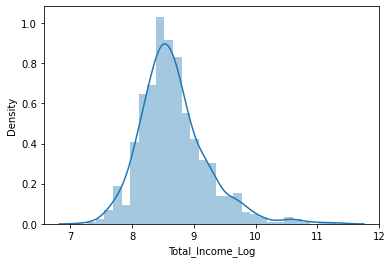

In [29]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income_Log"])

# Coorelation matrix

<AxesSubplot:>

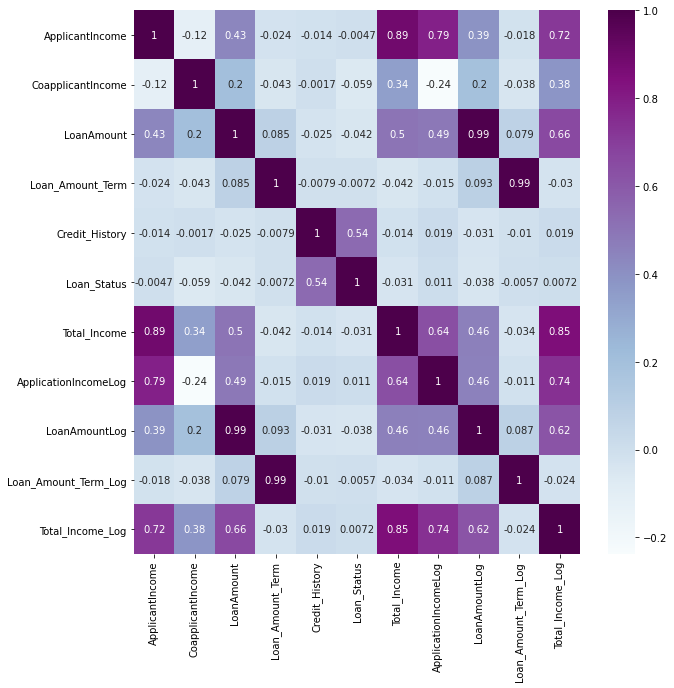

In [30]:
corr =df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot= True,cmap ="BuPu")

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicationIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,4.986426,5.886104,1.0,Urban,1,5849.0,8.674026,1.606719,1.772594,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,5.886104,1.0,Rural,0,6091.0,8.430109,1.579397,1.772594,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,5.886104,1.0,Urban,1,3000.0,8.006368,1.432618,1.772594,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,5.886104,1.0,Urban,1,4941.0,7.856707,1.566007,1.772594,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,4.948760,5.886104,1.0,Urban,1,6000.0,8.699515,1.599137,1.772594,8.699515


In [32]:
#drop unnecessary columns
cols=['ApplicantIncome', 'CoapplicantIncome',"LoanAmount","Loan_Amount_Term","Total_Income","Loan_ID","Dependents"]
df=df.drop(columns=cols,axis =1)

In [33]:
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicationIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,Graduate,No,1.0,Urban,1,8.674026,1.606719,1.772594,8.674026
1,Male,Yes,Graduate,No,1.0,Rural,0,8.430109,1.579397,1.772594,8.714568
2,Male,Yes,Graduate,Yes,1.0,Urban,1,8.006368,1.432618,1.772594,8.006368
3,Male,Yes,Not Graduate,No,1.0,Urban,1,7.856707,1.566007,1.772594,8.505323
4,Male,No,Graduate,No,1.0,Urban,1,8.699515,1.599137,1.772594,8.699515


# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
cols= ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status"]
le =LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [35]:
df.head()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicationIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,1.0,2,1,8.674026,1.606719,1.772594,8.674026
1,1,1,0,0,1.0,0,0,8.430109,1.579397,1.772594,8.714568
2,1,1,0,1,1.0,2,1,8.006368,1.432618,1.772594,8.006368
3,1,1,1,0,1.0,2,1,7.856707,1.566007,1.772594,8.505323
4,1,0,0,0,1.0,2,1,8.699515,1.599137,1.772594,8.699515


# TRAIN - TEST SPLIT

In [36]:
x = df.drop(columns=('Loan_Status'), axis =1)
y =df['Loan_Status']

In [37]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size= 0.1, random_state =48)

# model training

In [38]:
def classify(model,x,y):
    x_train , x_test , y_train, y_test = train_test_split(x,y,test_size= 0.25,random_state =2)
    model.fit(x_train,y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    
    score = cross_val_score(model ,x , y,cv = 5)
    print ("cross validation is,",np.mean(score)*100)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
classify( model,x, y)

Accuracy is 77.27272727272727
cross validation is, 80.9462881514061


C:\Users\maury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maury\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [40]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
classify(model,x,y)

Accuracy is 68.18181818181817
cross validation is, 72.47634279621484


In [41]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is 77.27272727272727
cross validation is, 77.68892443022791


In [42]:
model = ExtraTreesClassifier()
classify(model, x,y)

Accuracy is 76.62337662337663
cross validation is, 75.90030654404904


# hyperparameter tuning

In [43]:
model = RandomForestClassifier(n_estimators=100,min_samples_split =25,max_depth=7,max_features=1)
classify(model, x,y)

Accuracy is 75.97402597402598
cross validation is, 80.62108489937359


# Building random forest model with Hyperparameters

In [44]:
#number of trees in random forest
n_estimators =[int(x) for x in np.linspace(start =10, stop = 88 , num =10) ]
#number of features to consider at every split
max_features= ['auto','sqrt']
#maximum number of levels in tree
max_depth =[2,4]
#minimum number of samples required to split a node
min_samples_split =[2,5]
#minimum number of samples required at each leaf node
min_samples_leaf =[1,2]
# method of selecting samples for training each tree
bootstrap =[True,False]

In [45]:
param_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}
print (param_grid)

{'n_estimators': [10, 18, 27, 36, 44, 53, 62, 70, 79, 88], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [46]:
rf_Model = RandomForestClassifier()

In [47]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator =rf_Model , param_grid= param_grid, cv=3, verbose=2 ,n_jobs=4)

In [48]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 264 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 670 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   27.0s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 18, 27, 36, 44, 53, 62, 70, 79,
                                          88]},
             verbose=2)

In [49]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 18}

In [50]:
#check ACCURACY
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 0.795
Test Accuracy - : 0.758


In [51]:
import pickle
file =open('loan_prediction.pkl', 'wb')
pickle.dump (rf_Grid.best_params_,file)